In [16]:
import numpy as np
import pandas
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import networkx as nx
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster, cophenet
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [6]:
mO = pandas.read_csv('exemplesCSV/mucusOperon.csv')
moG = pandas.read_csv('exemplesCSV/mucusOperonGroup.csv')
ligne1 = moG.iloc[0]
l1 = ligne1.to_numpy()
print(l1)
base = mO.to_numpy()

[nan 0.0 0.2 0.2 0.2 0.1 0.1 nan]


In [7]:
def trouve_premier_ko(base):
    """base : tableau numpy
        retourne : la première ligne à laquelle est présente un KO"""
    n,m = np.shape(base)
    i = 0
    b = True
    indice = -1
    while(i < n and b):
        if(base[i][0] == "KO"):
            ind = i
            b = False
        i = i+1
    return ind

In [9]:
a = trouve_premier_ko(base)

In [10]:
print(a)

12


In [11]:
#base de ok
OK_base = mO[:a]
#base de ko
KO_base = mO[a:]
OK_base = OK_base.drop(['Error explanation'],axis=1)
KO_base = KO_base.drop(['Error explanation'],axis=1)
OK_base = OK_base.drop(['valid'],axis=1)
KO_base = KO_base.drop(['valid'],axis=1)

In [12]:
lab = OK_base.columns
print(lab)

Index(['K_operon', 'K_operon:alg', 'K_operon:free', 'K_operon:alg:free',
       'K_mucuB', 'K_mucuB:prod'],
      dtype='object')


In [14]:
Z = linkage(OK_base,method='average',metric='jaccard')


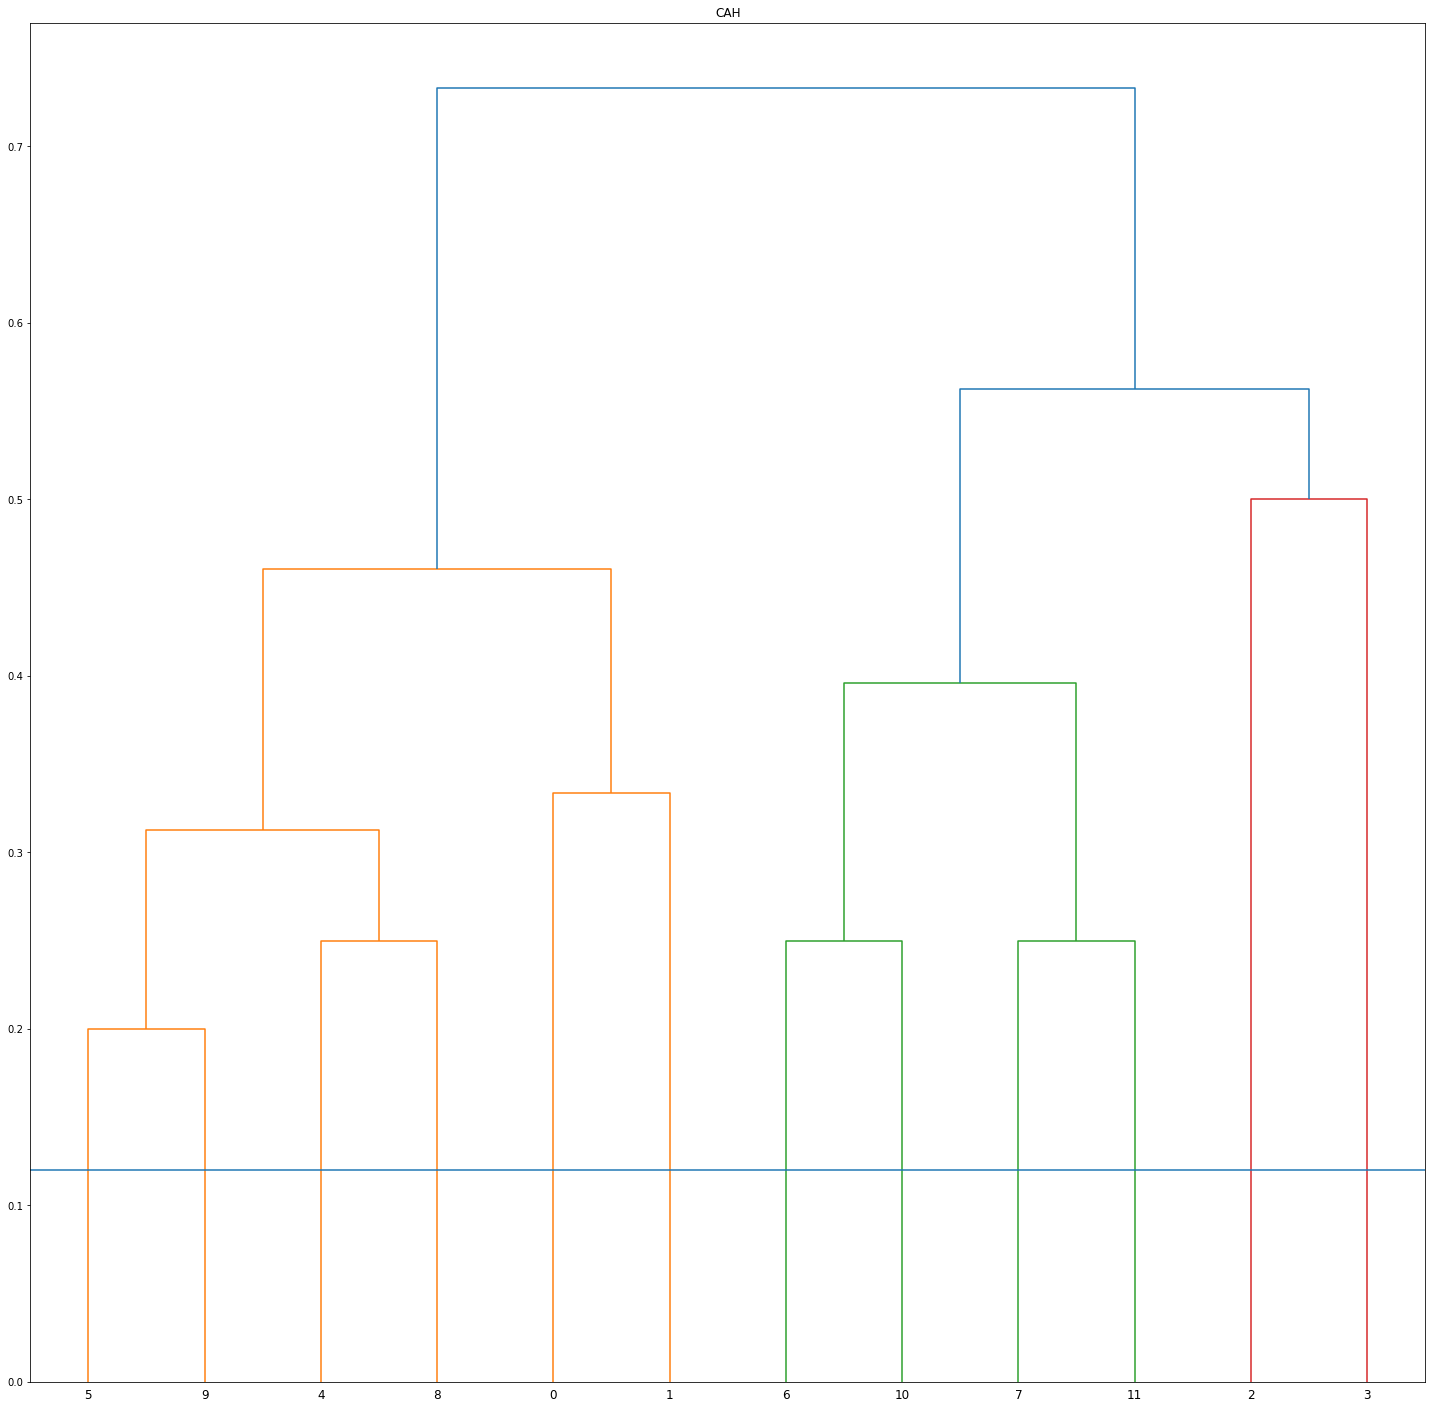

In [15]:
fig = plt.figure(1, figsize=(25, 25))
plt.title("CAH")
dendrogram(Z)
plt.axhline(y=0.12)
plt.show()

In [18]:
k=3

In [19]:
Hc = AgglomerativeClustering(n_clusters=k, affinity='jaccard', linkage='average')

In [20]:
Hc.fit(OK_base)

AgglomerativeClustering(affinity='jaccard', linkage='average', n_clusters=3)

In [21]:
l = Hc.labels_

In [22]:
def affiche_cluster(label, nb_cluster):
    for i in range(nb_cluster):
        print(np.where(label==i))
        
def retourne_cluster(label, nb_cluster):
    tableau = []
    for i in range(nb_cluster):
        tableau.append(np.where(label==i))
    return tableau

In [23]:
affiche_cluster(l,k)
clusters = retourne_cluster(l,k)

(array([2, 3]),)
(array([0, 1, 4, 5, 8, 9]),)
(array([ 6,  7, 10, 11]),)


In [32]:
print(clusters)

[(array([2, 3]),), (array([0, 1, 4, 5, 8, 9]),), (array([ 6,  7, 10, 11]),)]


La prochaine fonction va prendre en entree un tableau de cluster et les écrire dans un fichier txt
On fait cela car dans excel on pourra faire unprogramme vba qui colorira les lignes.

In [27]:
def ecriture_fichier(liste_cluster,nom_fichier):
    fichier = open(nom_fichier, "w")
    
    for c in liste_cluster:
        for modele in c:
            fichier.write(str(modele))
        fichier.write("\n")
    fichier.close()


In [33]:
ecriture_fichier(clusters, "essai.txt")